In [31]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import json 

In [32]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [33]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [34]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


apollonia gr
pyinmana mm
majene id
ushuaia ar
punta arenas cl
lorengau pg
hermanus za
cherskiy ru
tupik ru
vaini to
albany au
bengkulu id
atuona pf
qaanaaq gl
longyearbyen sj
port blair in
tonder dk
cape town za
chateauroux fr
bluff nz
tuktoyaktuk ca
olafsvik is
vaini to
mabaruma gy
dikson ru
busselton au
tucuman ar
stekolnyy ru
bengkulu id
vila do maio cv
banjar id
zhigansk ru
ushuaia ar
provideniya ru
puerto ayora ec
kapaa us
careva cuprija ba
punta arenas cl
albany au
kudahuvadhoo mv
taolanaro mg
nikolskoye ru
mataura pf
ushuaia ar
port elizabeth za
husavik is
kibala ao
qaanaaq gl
bethel us
punta arenas cl
hithadhoo mv
leningradskiy ru
east london za
lesnoy ru
taolanaro mg
mataura pf
albany au
saldanha za
hermanus za
butaritari ki
aklavik ca
cape town za
ushuaia ar
saint-philippe re
nipawin ca
valentin gomez farias mx
bluff nz
tiksi ru
carnarvon au
taolanaro mg
sobotin cz
hobart au
naftah tn
samalaeulu ws
bilma ne
harper lr
lolua tv
ushuaia ar
belushya guba ru
taolanaro mg
zeya ru
a

krasnyy chikoy ru
salalah om
camabatela ao
castro cl
jamestown sh
longyearbyen sj
lata sb
provideniya ru
new norfolk au
mataura pf
sao joao da barra br
albany au
aklavik ca
albany au
bluff nz
isangel vu
halalo wf
loukhi ru
hithadhoo mv
asfi ma
albany au
rikitea pf
khatanga ru
hithadhoo mv
punta arenas cl
nizhneyansk ru
port blair in
punta arenas cl
hobart au
severo-kurilsk ru
thompson ca
karakendzha tj
yuli tw
hobart au
pavlovsk ru
naifaru mv
nikolskoye ru
mataura pf
lolua tv
rikitea pf
caluquembe ao
kavaratti in
illoqqortoormiut gl
cabo san lucas mx
mar del plata ar
victoria sc
zyryanka ru
new norfolk au
ushuaia ar
lavrentiya ru
san pedro de macoris do
atuona pf
albany au
seoni malwa in
nikolskoye ru
rikitea pf
busselton au
bambous virieux mu
araouane ml
zeya ru
new norfolk au
victoria sc
taolanaro mg
sapele ng
sorland no
upernavik gl
vaini to
mataura pf
anadyr ru
rikitea pf
nanortalik gl
sitka us
yeniseysk ru
barkhan pk
haines junction ca
springdale ca
saint-augustin ca
pevek ru
bono

samusu ws
atuona pf
porbandar in
cabedelo br
punta arenas cl
punta arenas cl
gayny ru
geraldton au
campbell river ca
dinsor so
codrington ag
bogorodskoye ru
hede cn
hay river ca
rikitea pf
ushuaia ar
lompoc us
sao bernardo br
turbat pk
dongsheng cn
vaini to
santa maria cv
ordzhonikidze ua
hamilton bm
bluff nz
alice springs au
busselton au
ushuaia ar
rikitea pf
asyut eg
hobart au
kapaa us
avarua ck
kapaa us
busselton au
kieta pg
haibowan cn
taolanaro mg
eastbourne gb
alofi nu
hamilton bm
chuy uy
ushuaia ar
fortuna us
miandrivazo mg
ushuaia ar
shu kz
cherskiy ru
rikitea pf
albany au
orbetello it
hobart au
kapaa us
hithadhoo mv
hofn is
port lavaca us
taolanaro mg
nanortalik gl
busselton au
cape town za
nikolskoye ru
cape town za
bengkulu id
bredasdorp za
punta arenas cl
bethel us
ilulissat gl
santa rosa de osos co
kumluca tr
cherskiy ru
thessalon ca
bredasdorp za
hilo us
camacha pt
ribeira grande pt
ahipara nz
kendal id
hithadhoo mv
leningradskiy ru


In [35]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [36]:
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [37]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [38]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):


    # Group cities in sets of 50 for logging purposes.
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
            time.sleep(60)

    # Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
        record_count += 1
        
        # Run an API request for each of the cities.
        try:
        # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
        # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | apollonia
Processing Record 2 of Set 1 | pyinmana
Processing Record 3 of Set 1 | majene
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | lorengau
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | tupik
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | port blair
Processing Record 17 of Set 1 | tonder
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | chateauroux
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | olafsvik
Processing Record 23 of Set 1 | mabaruma
Process

Processing Record 36 of Set 4 | maltahohe
Processing Record 37 of Set 4 | sao filipe
Processing Record 38 of Set 4 | puerto cabello
Processing Record 39 of Set 4 | sayyan
Processing Record 40 of Set 4 | ecatzingo
City not found. Skipping...
Processing Record 41 of Set 4 | arlit
Processing Record 42 of Set 4 | grindavik
Processing Record 43 of Set 4 | wolsztyn
Processing Record 44 of Set 4 | kruisfontein
Processing Record 45 of Set 4 | muroran
Processing Record 46 of Set 4 | tabou
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | thinadhoo
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | bredasdorp
Processing Record 1 of Set 5 | viedma
Processing Record 2 of Set 5 | olinda
Processing Record 3 of Set 5 | kalemie
Processing Record 4 of Set 5 | upernavik
Processing Record 5 of Set 5 | kui buri
Processing Record 6 of Set 5 | illela
Processing Record 7 of Set 5 | porto novo
Processing Record 8 of Set 5 | jumla
Processing Record 9 of Set 5

Processing Record 23 of Set 8 | bonoua
Processing Record 24 of Set 8 | burlington
Processing Record 25 of Set 8 | sibolga
Processing Record 26 of Set 8 | kurilsk
Processing Record 27 of Set 8 | hamilton
Processing Record 28 of Set 8 | pointe michel
Processing Record 29 of Set 8 | makakilo city
Processing Record 30 of Set 8 | krasnyye barrikady
Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | nuuk
Processing Record 33 of Set 8 | port hedland
Processing Record 34 of Set 8 | pauini
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | opotiki
Processing Record 37 of Set 8 | flinders
Processing Record 38 of Set 8 | zelenogorskiy
Processing Record 39 of Set 8 | kristiinankaupunki
Processing Record 40 of Set 8 | asamankese
Processing Record 41 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 8 | conde
Processing Record 43 of Set 8 | quatre cocos
Processing Record 44 of Set 8 | el alto
Processing Record 45 of Set 8 | pozo c

Processing Record 9 of Set 12 | kansanshi
Processing Record 10 of Set 12 | kulhudhuffushi
Processing Record 11 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 12 of Set 12 | waipawa
Processing Record 13 of Set 12 | hatillo
Processing Record 14 of Set 12 | formiga
Processing Record 15 of Set 12 | axim
Processing Record 16 of Set 12 | puerto el triunfo
Processing Record 17 of Set 12 | puerto escondido
Processing Record 18 of Set 12 | nadym
Processing Record 19 of Set 12 | ixtapa
Processing Record 20 of Set 12 | kapasan
Processing Record 21 of Set 12 | felanitx
Processing Record 22 of Set 12 | porbandar
Processing Record 23 of Set 12 | cabedelo
Processing Record 24 of Set 12 | gayny
Processing Record 25 of Set 12 | campbell river
Processing Record 26 of Set 12 | dinsor
City not found. Skipping...
Processing Record 27 of Set 12 | codrington
Processing Record 28 of Set 12 | bogorodskoye
Processing Record 29 of Set 12 | hede
Processing Record 30 of Set 12 | hay river
Proce

In [42]:
len(city_data)

543

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Apollonia,36.9716,24.7231,53.19,73,99,10.09,GR,2022-04-04 20:00:14
1,Pyinmana,19.7333,96.2167,80.49,57,55,4.56,MM,2022-04-04 20:00:14
2,Majene,-3.5403,118.9707,77.27,84,98,2.62,ID,2022-04-04 20:00:14
3,Ushuaia,-54.8000,-68.3000,39.15,75,93,6.33,AR,2022-04-04 20:00:06
4,Punta Arenas,-53.1500,-70.9167,44.62,65,20,27.63,CL,2022-04-04 19:55:24
5,Lorengau,-2.0226,147.2712,82.04,79,100,14.90,PG,2022-04-04 20:00:17
6,Hermanus,-34.4187,19.2345,59.81,82,13,11.99,ZA,2022-04-04 20:00:18
7,Cherskiy,68.7500,161.3000,-19.28,97,71,2.13,RU,2022-04-04 20:00:19
8,Tupik,54.4253,119.9327,6.64,96,100,3.29,RU,2022-04-04 20:00:19
9,Vaini,-21.2000,-175.2000,75.88,81,99,17.05,TO,2022-04-04 20:00:21


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.tail()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
538,Santa Rosa De Osos,CO,2022-04-04 20:14:25,6.6474,-75.4603,60.10,85,97,3.62
539,Kumluca,TR,2022-04-04 20:14:25,36.3703,30.2869,63.37,58,58,2.19
540,Thessalon,CA,2022-04-04 20:14:26,46.2501,-83.5666,39.49,85,98,8.34
541,Camacha,PT,2022-04-04 20:14:26,33.0833,-16.3333,54.82,58,40,20.71
542,Kendal,GB,2022-04-04 20:14:27,54.3268,-2.7476,50.83,99,100,15.26


In [69]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

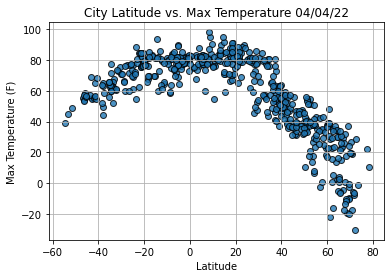

In [62]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

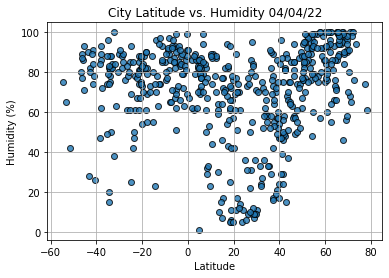

In [64]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

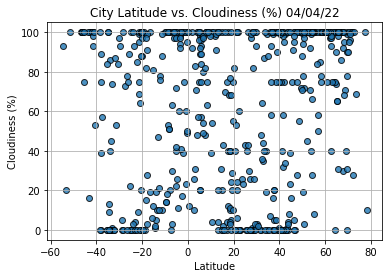

In [70]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

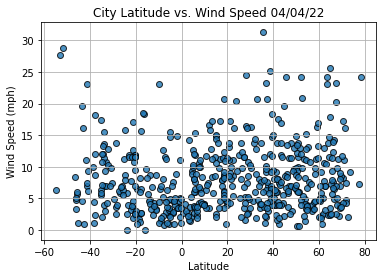

In [71]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [76]:

#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


ERROR! Session/line number was not unique in database. History logging moved to new session 104


In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


NameError: name 'plot_linear_regression' is not defined